In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [50]:
df=pd.read_csv('C:\\Users\\PMLS\\Downloads\\archive (1)\\diabetes_prediction_dataset.csv')
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.head())
print(df.shape)


(100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
(96146, 9)


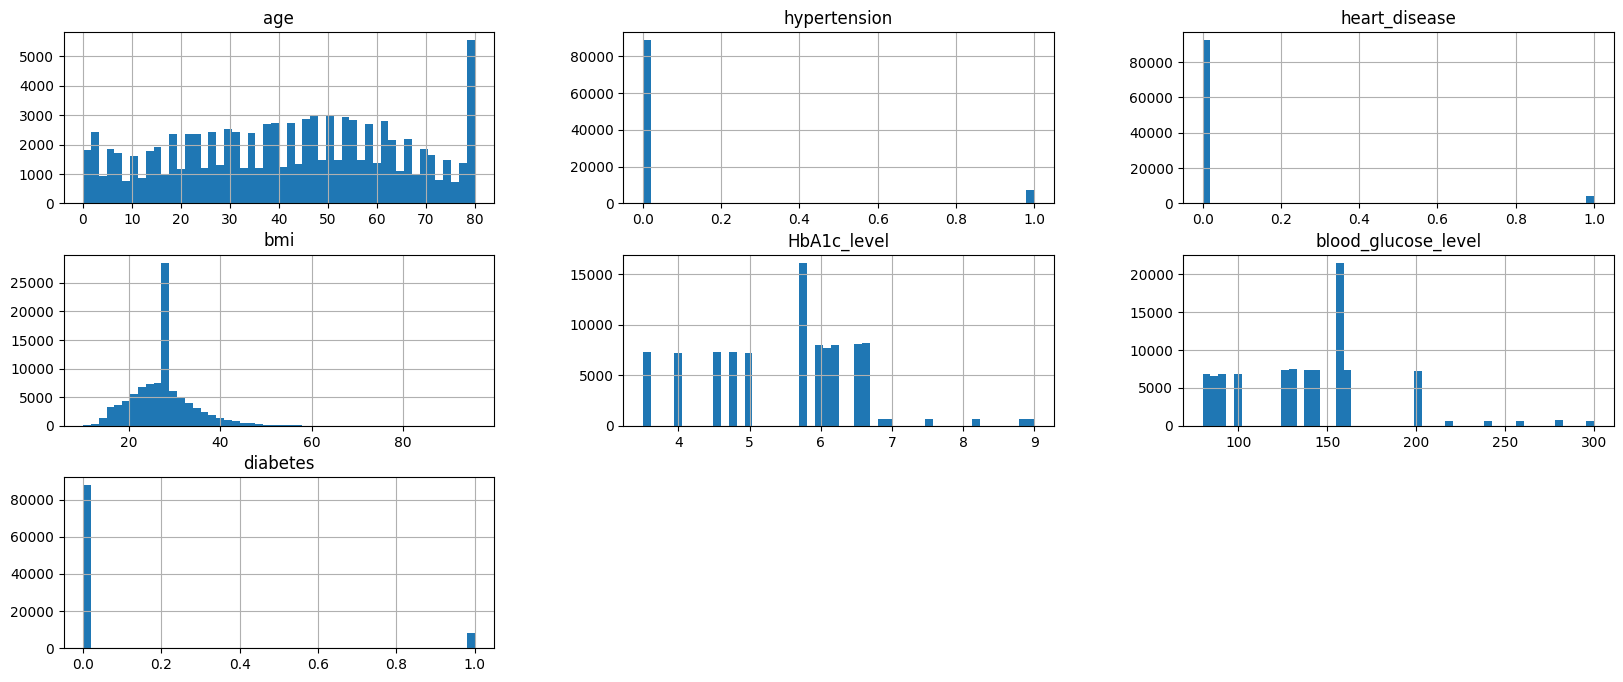

In [51]:
df.hist(bins=50,figsize=(20,8))
plt.show()

In [53]:
df1=pd.get_dummies(df)
df1.drop(['gender_Other','smoking_history_not current'],axis='columns',inplace=True)
y=df1['diabetes']
x=df1.drop('diabetes',axis=1)
print(df1.head())


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  smoking_history_No Info  \
0         0           True        False                    False   
1         0           True        False                     True   
2         0          False         True                    False   
3         0           True        False                    False   
4         0          False         True                    False   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                    False  

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=50)
model=linear_model.LinearRegression()


In [72]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.fit_transform(X_test_scaled)

model.fit(X_train_poly,Y_train)
y_pre=model.predict(X_test_poly)
print(y_pre[0:5])
print(Y_test[0:5])
print(model.score())

[ 8.37731411e+08  8.37731412e+08 -8.65549044e+09  7.79187814e+08
  4.36561210e+09]
97355    0
49023    0
64298    0
93680    0
15923    1
Name: diabetes, dtype: int64


TypeError: RegressorMixin.score() missing 2 required positional arguments: 'X' and 'y'